# Úvod

# Air Passengers

Datová sada poskytuje měsíční celkové údaje o cestujících americké letecké společnosti od roku 1949 do roku 1960. Tato datová sada je převzata z vestavěné datové sady R s názvem AirPassengers.

[Odkaz](https://www.kaggle.com/datasets/chirag19/air-passengers) na dataset dostupný na Kaggle.

# Načtení všech knihoven

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [21]:
file_path = "datasets/AirPassengers.csv"
df = pd.read_csv(file_path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df = df.rename(columns={"#Passengers": "Passengers"})

In [4]:
df.shape

(144, 2)

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df["Month"] = pd.to_datetime(df["Month"])
df.index = df["Month"]
df = df.drop("Month", axis=1)

In [8]:
data = df["Passengers"]
data = data.astype(int)
data = data.values.reshape(-1, 1)

In [9]:
data[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

In [10]:
data.shape

(144, 1)

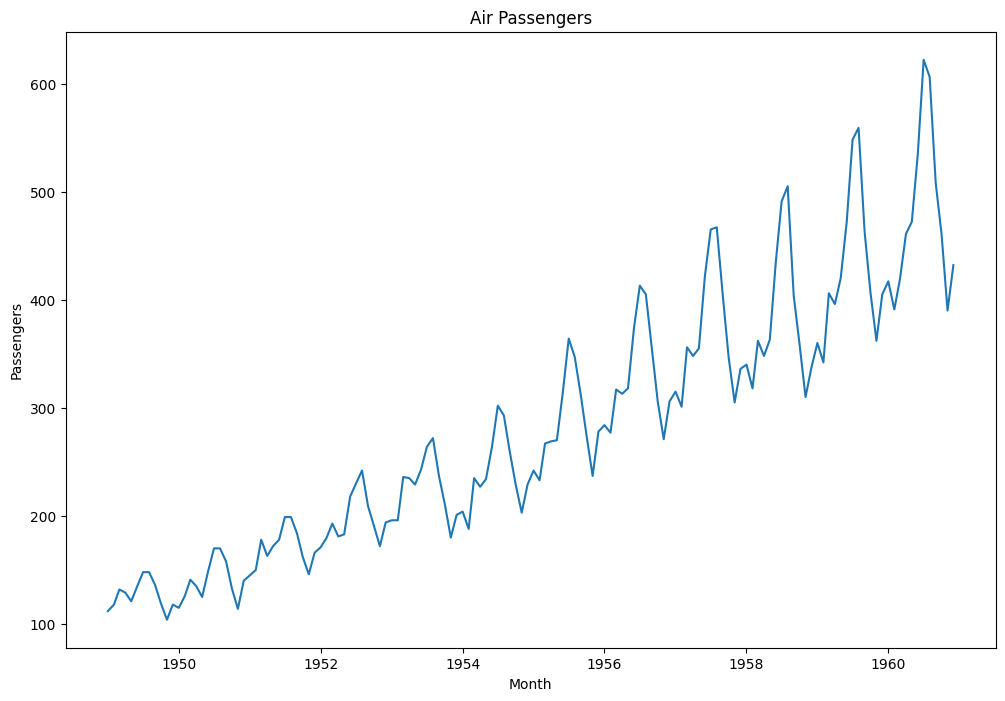

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(df)
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Air Passengers")
plt.show()

# RNN

In [12]:
split_ratio = 0.8
split_index = int(split_ratio * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

In [13]:
print(f"Train data shape: {train_data.shape}\nTest data shape: {test_data.shape}")

Train data shape: (115, 1)
Test data shape: (29, 1)


## Encoder

In [14]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [15]:
train_data[:10]

array([[0.02067183],
       [0.03617571],
       [0.07235142],
       [0.06459948],
       [0.04392765],
       [0.08010336],
       [0.11369509],
       [0.11369509],
       [0.08268734],
       [0.03875969]])

## Create features

In [16]:
X, Y = [], []
for i in range(1, len(train_data)):
    X.append(train_data[i - 1:i])
    Y.append(train_data[i])
X, Y = np.array(X), np.array(Y)

In [17]:
X_train = X[:split_index]
Y_train = Y[:split_index]
X_test = X[split_index:]
Y_test = Y[split_index:]
print(
    f"X_train shape: {X_train.shape}\nY_train shape: {Y_train.shape}\nX_test shape: {X_test.shape}\nY_test shape: {Y_test.shape}")

X_train shape: (114, 1, 1)
Y_train shape: (114, 1)
X_test shape: (0, 1, 1)
Y_test shape: (0, 1)


# LTSM

# ARIMA